# Assignment_13_Random_Forest(Fraud_Check)

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd

In [2]:
fraud_c = pd.read_csv("D:\\Data Science\\Assignments DS\\LMS Assignments DS\\Fraud_check.csv")
fraud_c.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
tax_inc = []
for i in fraud_c['Taxable.Income']:
    if i<=30000:
        tax_inc.append("Risky")
    else:
        tax_inc.append("Good")
fraud_c['tax_inc'] = tax_inc

In [4]:
fraud_c.columns  # column names

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [5]:
# Changing column name
fraud_c.rename({'Marital.Status': 'Marital_status'}, axis = 1, inplace = True)

In [6]:
fraud_c.drop('Taxable.Income', axis = 1, inplace = True)  # Drop repeated column
fraud_c.columns

Index(['Undergrad', 'Marital_status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [7]:
fraud_c[fraud_c.duplicated()]   # No duplicated column

,Undergrad,Marital_status,City.Population,Work.Experience,Urban,tax_inc


In [8]:
fraud_c.shape

(600, 6)

In [9]:
fraud_c.info()   # check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [10]:
fraud_c.describe()   # Discriptive statistic

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [11]:
# Check unique values
print(fraud_c['Undergrad'].unique())
print(fraud_c['Marital_status'].unique())
print(fraud_c['Urban'].unique())
print(fraud_c['tax_inc'].unique())

['NO' 'YES']
['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [12]:
# Checking value counts of each value
print(fraud_c['Undergrad'].value_counts())
print(fraud_c['Marital_status'].value_counts())
print(fraud_c['Urban'].value_counts())
print(fraud_c['tax_inc'].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital_status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_inc, dtype: int64


In [13]:
# Convert data types of each categorical columns into numeric variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
fraud_c['Undergrad'] = LE.fit_transform(fraud_c['Undergrad'])
fraud_c['Marital_status'] = LE.fit_transform(fraud_c['Marital_status'])
fraud_c['Urban'] = LE.fit_transform(fraud_c['Urban'])
fraud_c['tax_inc'] = LE.fit_transform(fraud_c['tax_inc'])

In [14]:
fraud_c.corr()  # correlation

,Undergrad,Marital_status,City.Population,Work.Experience,Urban,tax_inc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital_status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_inc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


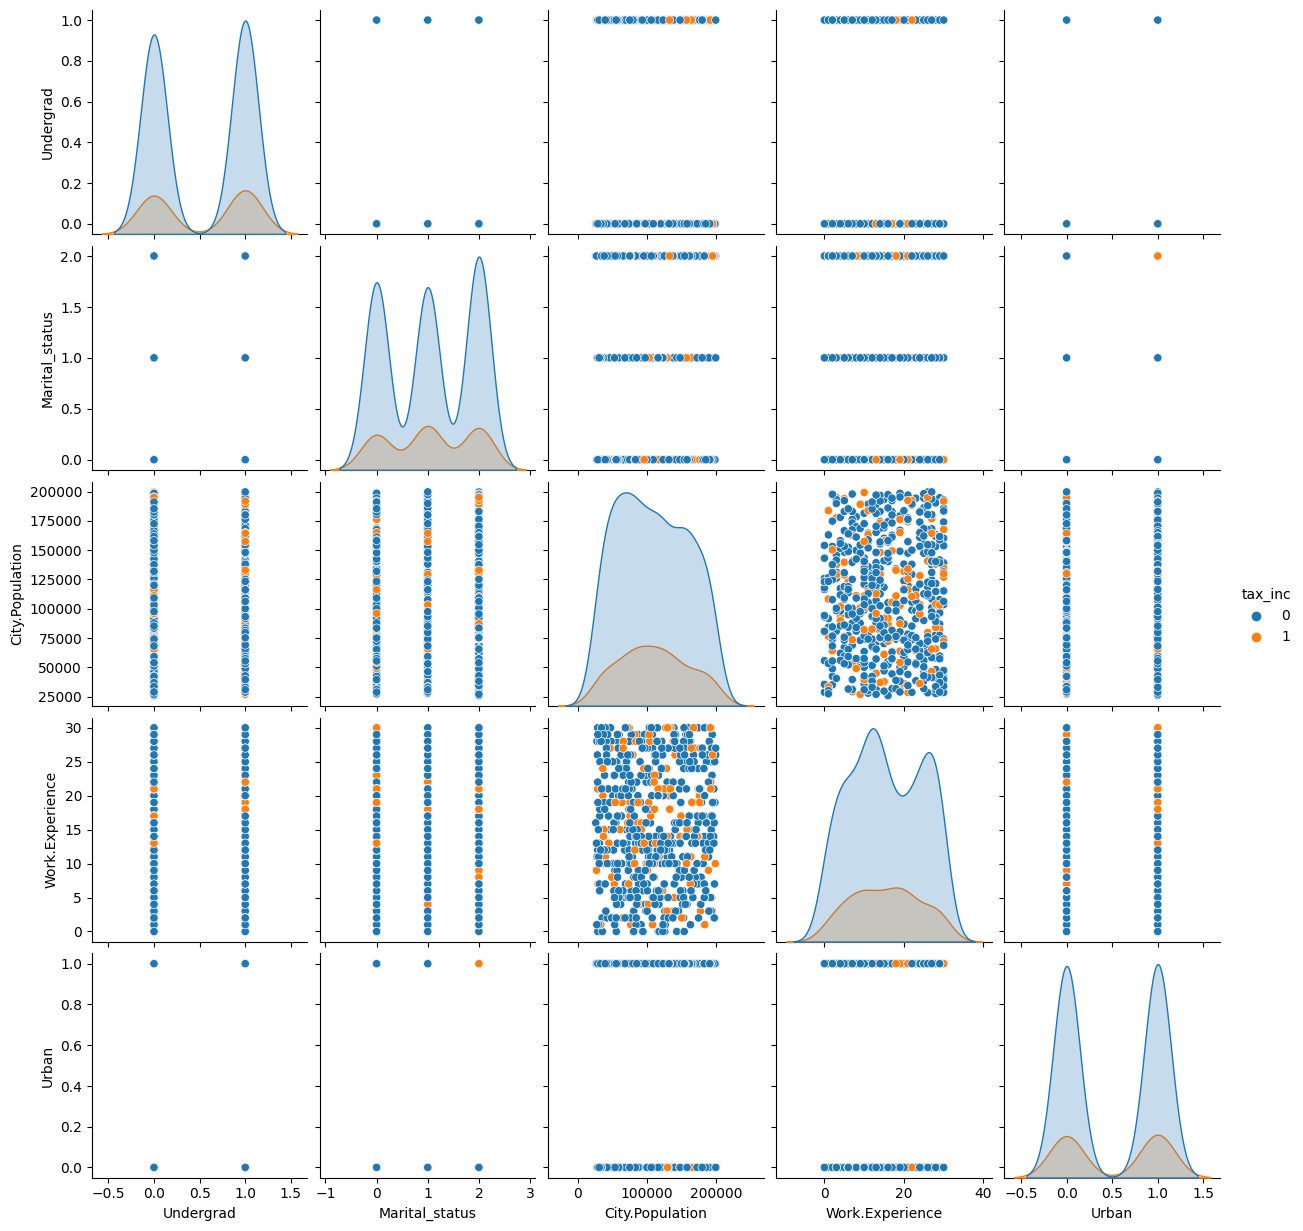

In [15]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(fraud_c, hue = 'tax_inc')
plt.show()

# Random Forest Classification

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [25]:
array = fraud_c.values
X = array[:,:-1]
Y = array[:,-1]
# print(X)
# print(Y)

[[     0      2  50047     10      1]
 [     1      0 134075     18      1]
 [     0      1 160205     30      1]
 ...
 [     0      0 154058      0      1]
 [     1      1 180083     17      0]
 [     0      0 158137     16      0]]
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0

In [18]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)  # Boostrap
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean())

[0.78333333 0.7        0.8        0.8        0.71666667 0.71666667
 0.75       0.63333333 0.78333333 0.73333333]
Accuracy is:  0.7416666666666667


# Bagging Decision Trees for Classification

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
X = array[:,:-1]
Y = array[:,-1]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True) # Evaluate Method
cart = DecisionTreeClassifier()

model = BaggingClassifier()

results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.7483333333333333


# Adaboost Classification

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [22]:
X = array[:,:-1]
Y = array[:,-1]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)  # Evaluate Method

model = AdaBoostClassifier(n_estimators = 10, random_state = 7)  # Classifier

results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.7933333333333332


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [24]:
array = fraud_c.values

X = array[:,:-1]
Y = array[:,-1]
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

#Create sub model
estimators = []
model1 = LogisticRegression(max_iter = 500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

#Create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean())

[0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]
Accuracy is:  0.7933333333333332
